(506, 14)
傾き： 10.35
切片： -41.24
1次元配列のX_plt [5 6 7 8]
2次元配列のX_plt [[5]
 [6]
 [7]
 [8]]


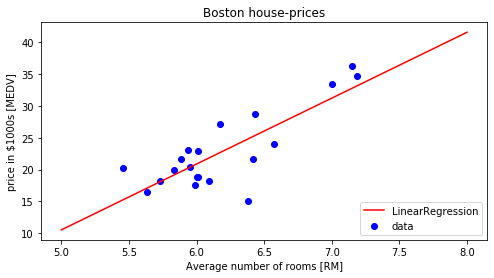

In [1]:
# データから切片と傾きを算出し予測モデルとする方法

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#　住宅価格データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
pd.DataFrame(df.head())
print(df.shape)
# 特徴量に平均部屋数（RM）の20件を設定
# 特徴量は大文字で表記する
X = df[:20][['RM']].values
# 正解に住宅価格（MEDV）の20件を設定
y = df[:20]['MEDV'].values
# 特徴量と正解の先頭5行を表示
X[:5], y[:5]
# 特徴量と正解の形状
X.shape, y.shape

# 線形回帰モデルを作成
model = LinearRegression()
# モデルの訓練
model.fit(X, y)
# パラメータの取り出し
print('傾き： %.2f' % model.coef_)
print('切片： %.2f' % model.intercept_)

# モデルを使い、部屋数から住宅価格を予測
new_data = np.array([[6]])
model.predict(new_data)

# 1次関数作成用に部屋数の変数 X_plt を作成
X_plt = np.arange(5, 9, 1)
print('1次元配列のX_plt', X_plt)
# X_pltを2次元配列に変換
X_plt = np.arange(5, 9, 1)[:, np.newaxis]
print('2次元配列のX_plt', X_plt)

plt.figure(figsize=(8, 4))
# モデルのプロット
y_pred = model.predict(X_plt)

# 部屋数と住宅価格の散布図と1次関数のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', linestyle='-', label='LinearRegression')
plt.ylabel('price in $1000s [MEDV]')
plt.xlabel('Average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='lower right')
plt.show()